## Prepared by -- Uday Prakash Jaiswal
## Task-2 GRIP Un-Supervised Machine Learning

## Predict the optimum number of clusters and visualize it graphically.
### Dataset Used: IRIS Data 
### Target Variable: Category of Flower Based on it feature

In [1]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#loading the dataset from the url
IrisData=pd.read_csv('C:/Users/My PC/Downloads/Iris.csv')
IrisData.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#Some data preprocessing 
#removing the ID column - as it does not have any use in our analysis
Cols=IrisData.columns
Cols=list(Cols)
Cols.remove('Id')
IrisData=IrisData[Cols]
IrisData.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Information about the data
IrisData.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
print("shape of the dataset ",IrisData.shape)
IrisData.info()
#checking for null values
IrisData.isna().sum()

shape of the dataset  (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
#drop duplicate rows if any
print("Shape before removing duplicates",IrisData.shape)
IrisData=IrisData.drop_duplicates()
print("Shape before removing duplicates",IrisData.shape)

Shape before removing duplicates (150, 5)
Shape before removing duplicates (147, 5)


**There are 3 duplicate records which got removed**

## Checking the distribution of our Target Categorical Variable

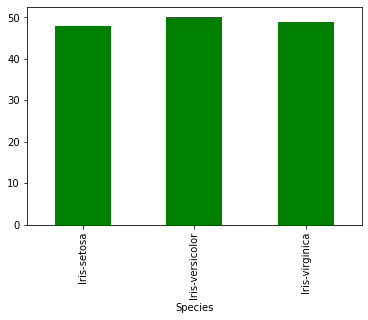

In [6]:
IrisData.groupby('Species').size().plot(kind='bar',color='green')

In [7]:
IrisData['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

## Checking the Distribution for our independent variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018845BA56A0>,
      dtype=object)

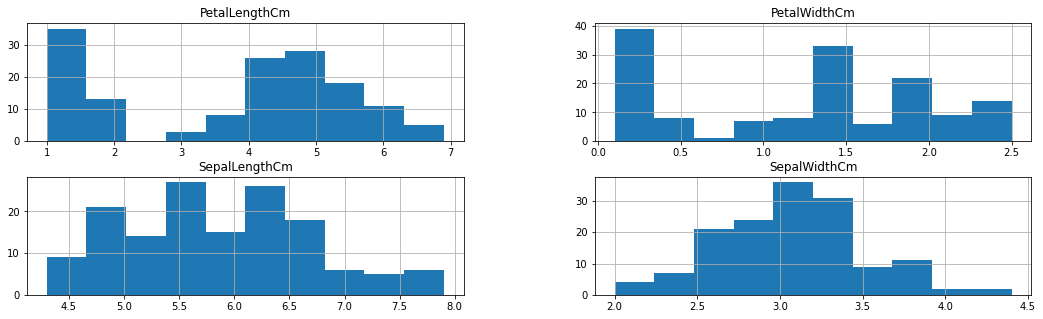

In [8]:
IrisData.hist(Cols,figsize=(18,5))

## Checking the importance and relevance of the variables with Target 

## Boxplot_Visualisation

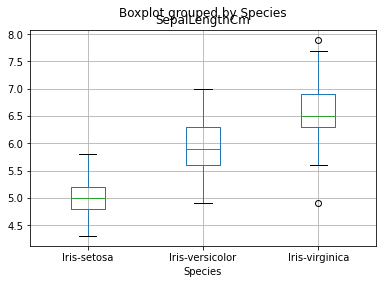

In [9]:
IrisData.boxplot(by='Species',column='SepalLengthCm')

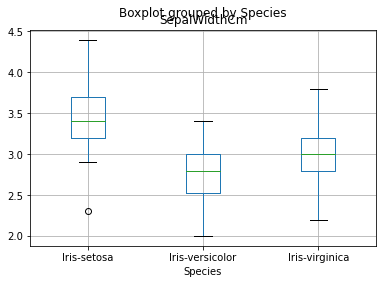

In [10]:
IrisData.boxplot(by='Species',column='SepalWidthCm')

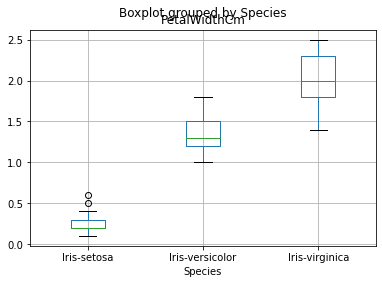

In [11]:
IrisData.boxplot(by='Species',column='PetalWidthCm')

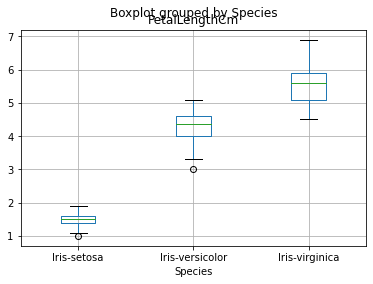

In [12]:
IrisData.boxplot(by='Species',column='PetalLengthCm')

## AnovaTest 

In [13]:
Cols.remove('Species')
from scipy.stats import f_oneway
def AnovaTest(inpData,CatCols,Target):
    print("Anova Results ----------------- ")
    ImpCatCols=[]
    
    for i in Cols:
        AnovaData=inpData.groupby(Target)[i].apply(list)
        AnovaResult=f_oneway(*AnovaData)
        if AnovaResult[1]<0.05:
            print(i,"Is CORREALTED with SPECIES | P- VALUE |",AnovaResult[1])
            ImpCatCols.append(i)
        else:
            print(i,"Is NOT - CORREALTED with SPECIES | P- VALUE |",AnovaResult[1])
    return ImpCatCols


#calling the Function
ImpCatCols=AnovaTest(IrisData,Cols,'Species')

Anova Results ----------------- 
SepalLengthCm Is CORREALTED with SPECIES | P- VALUE | 7.530911607751589e-31
SepalWidthCm Is CORREALTED with SPECIES | P- VALUE | 1.150337645778676e-16
PetalLengthCm Is CORREALTED with SPECIES | P- VALUE | 8.180545708674455e-89
PetalWidthCm Is CORREALTED with SPECIES | P- VALUE | 1.3529729471552313e-82


## Converting the categorical Species column into numerical values for our ML Model

In [14]:
IrisData.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
#IrisData['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2 },inplace=True)
#IrisData.head()

## Clustering Algorithms- Elbow Method

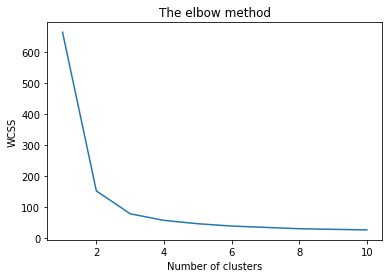

In [16]:
X= IrisData.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()
    

**after 3 cluster the curve flattens***

In [17]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
cluster_obj = kmeans.fit_predict(X)

In [18]:
print(cluster_obj)
X

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0
 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

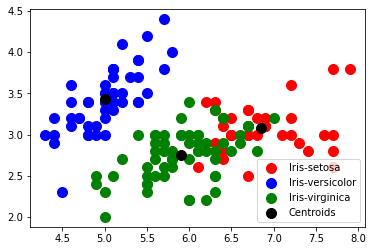

In [19]:
# Visualising the clusters - On the first two columns
plt.scatter(X[cluster_obj == 0, 0], X[cluster_obj == 0, 1],s = 100, c = 'red', label = 'Iris-setosa') 
plt.scatter(X[cluster_obj == 1, 0], X[cluster_obj == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolor') 
plt.scatter(X[cluster_obj == 2, 0], X[cluster_obj == 2, 1],s = 100, c = 'green', label = 'Iris-virginica') 

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')

plt.legend()

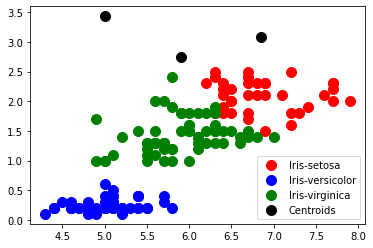

In [20]:
# Visualising the clusters - On the first and third column
plt.scatter(X[cluster_obj == 0, 0], X[cluster_obj == 0, 3],s = 100, c = 'red', label = 'Iris-setosa') 
plt.scatter(X[cluster_obj == 1, 0], X[cluster_obj == 1, 3],s = 100, c = 'blue', label = 'Iris-versicolor') 
plt.scatter(X[cluster_obj == 2, 0], X[cluster_obj == 2, 3],s = 100, c = 'green', label = 'Iris-virginica') 

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')

plt.legend()

## plot the data with help of seaborn library

In [21]:
Cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

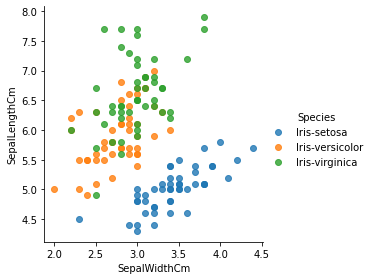

In [22]:
#plot data with seaborn

import seaborn as sns
facet = sns.lmplot(data=IrisData, x='SepalWidthCm', y='SepalLengthCm', hue='Species', 
                   fit_reg=False, legend=True, legend_out=True,height=4)

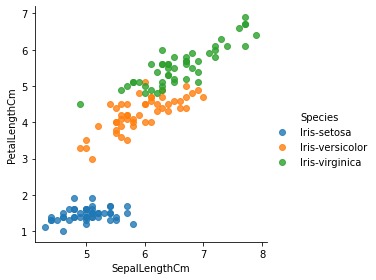

In [23]:
import seaborn as sns
facet = sns.lmplot(data=IrisData, x='SepalLengthCm', y='PetalLengthCm', hue='Species', 
                   fit_reg=False, legend=True, legend_out=True,height=4)

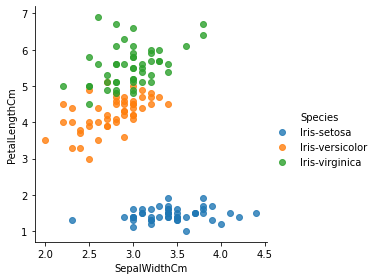

In [24]:

facet = sns.lmplot(data=IrisData, x='SepalWidthCm', y='PetalLengthCm', hue='Species', 
                   fit_reg=False, legend=True, legend_out=True,height=4)

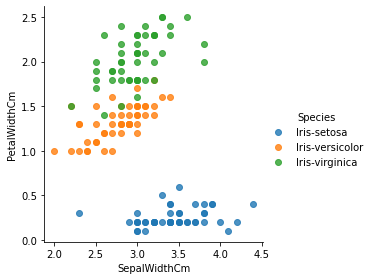

In [25]:

facet = sns.lmplot(data=IrisData, x='SepalWidthCm', y='PetalWidthCm', hue='Species', 
                   fit_reg=False, legend=True, legend_out=True,height=4)